In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets=1, noise = 0.3)
#noise is outlier dataset is little bit complex, targets var is dependent variable in regression we only need only one value

In [4]:
X

array([[-1.05200601, -0.66317808],
       [-0.03280582,  2.39759023],
       [ 1.31015549,  1.6024735 ],
       ...,
       [ 0.34220849,  1.12414236],
       [ 0.59069021,  0.31879285],
       [-0.37162336, -0.14432691]])

In [5]:
y

array([-1.33830481e+02,  1.52466573e+02,  2.16200899e+02,  9.51911064e+01,
       -4.60617727e+01,  3.99580708e+01, -2.30188695e+02,  1.60271188e+01,
        4.32343967e+01,  1.10443289e+02,  1.89387134e+02, -2.09390004e+02,
       -4.76821414e+00,  8.39064071e+01, -1.44230118e+02, -2.01052510e+01,
        1.21549475e+02, -8.98028652e+01,  2.52777394e+02, -2.56564325e+02,
        8.39653139e+01, -1.30085017e+01,  1.37275615e+02,  1.71542460e+02,
       -7.60085346e+00, -1.09755418e+00, -3.84427505e+02, -3.26278626e+02,
        5.81517670e+00, -1.06373506e+02,  5.54602301e+01,  2.32246029e+01,
       -1.00666207e+02,  1.40519400e+02, -1.96272746e+02,  7.10877896e+01,
       -4.26763368e+01, -1.06307983e+02,  7.13975381e+01, -2.67400986e+02,
        2.25618785e+02,  1.60942534e+02, -6.36532349e+01,  1.07824392e+02,
       -6.26832384e+01, -1.67864985e+02,  1.58677934e+02,  1.02493887e+02,
       -2.25122056e+01, -1.05426254e+02,  1.22571699e+02,  1.02527089e+02,
       -5.66999139e+01, -

<Axes: xlabel='0', ylabel='1'>

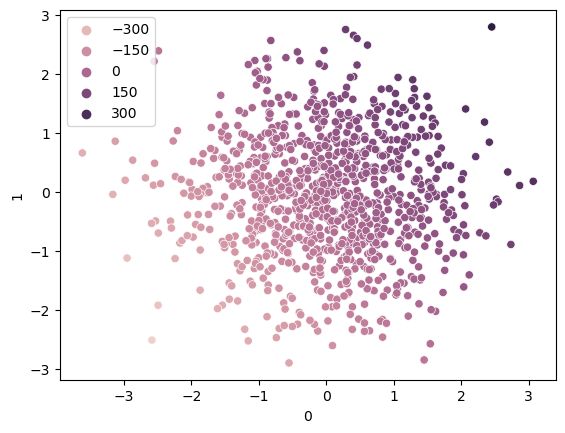

In [9]:
sns.scatterplot(x = pd.DataFrame(X)[0] , y=pd.DataFrame(X)[1],hue = y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.30 , random_state = 1)

In [13]:
X_train.shape, y_test.shape

((700, 2), (300,))

In [14]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [15]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [16]:
y_pred = svr.predict(X_test)

In [17]:
y_pred

array([-2.99084815e+01,  9.60452006e+01, -1.95826923e+02,  2.52775277e+02,
       -1.50188394e+01,  1.90333572e+02,  4.82758637e+01, -4.57373069e+01,
       -3.33511087e+01, -1.06063926e+02, -7.43101575e+01, -9.35705619e+01,
       -2.54115707e+02,  6.14956725e+00, -9.28891197e+01,  3.91113998e+01,
       -7.08830123e+01, -2.30074648e+02, -4.43044688e+01,  1.13741054e+02,
       -3.67930168e+01, -1.52663568e+02,  1.43849027e+02,  1.39626141e+02,
        2.61131436e+01, -4.29397817e+01, -7.34393871e+01,  1.73398381e+02,
       -1.02097159e+02, -1.76258256e+01,  9.92581020e+01, -1.06225529e+02,
       -8.89799791e+01,  3.79805843e+01, -4.26231606e+01,  1.28129678e+02,
        9.50956700e+01, -8.23029149e+01,  1.03937369e+02, -1.40023748e+02,
        6.94122405e+01, -1.65643653e+02,  8.76350346e+01, -2.34810650e+01,
       -1.39270775e+02, -5.87870101e+01,  7.96398698e+01,  1.60443289e+02,
       -2.74700231e+01,  1.05231378e+02, -1.13237438e+02, -1.95980540e+02,
        5.85394457e+01,  

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999922777191721

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'C':[1,2,3,4,5,6,10,50,100],
         'gamma':[0.1,0.2,0.0001],
         'kernel':['linear'],
         'epsilon':[0.1,0.001,0.2, 0.3]}

In [20]:
params

{'C': [1, 2, 3, 4, 5, 6, 10, 50, 100],
 'gamma': [0.1, 0.2, 0.0001],
 'kernel': ['linear'],
 'epsilon': [0.1, 0.001, 0.2, 0.3]}

In [21]:
grid = GridSearchCV(SVR(),param_grid=params, cv = 5 , verbose = 3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.2, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, ke

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 50, 100],
                         'epsilon': [0.1, 0.001, 0.2, 0.3],
                         'gamma': [0.1, 0.2, 0.0001], 'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 0.1, 'kernel': 'linear'}

In [24]:
grid.best_score_

0.999991763057136